# Day 08. Exercise 01
# Binary classifier. SVM. Decision tree

## 0. Imports

In [452]:
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression

import numpy as np

from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier, plot_tree

## 1. Preprocessing and logreg visualization

Read the file `am_pm.csv` to a dataframe from the previous exercise.

1. Draw a plot where the x-axis is `am`, the y-axis is `pm`, dots are the days, color depends on the target.
2. Add the decision boundary of logistic regression to the plot.
3. Draw the same plot (with the boundary), but the color should depend this time on the predictions.

Now it should be clear for you how the logistic regression works.

In [453]:
data = pd.read_csv("../data/data_with_predicts.csv")

In [454]:
data

,Unnamed: 0,day,morning,afternoon,is_weekend,predict
0,0,2020-04-17,21,2,0,1
1,1,2020-04-18,1,68,1,0
2,2,2020-04-19,18,15,1,0
3,3,2020-04-20,2,23,0,0
4,4,2020-04-21,0,25,0,0
5,5,2020-04-22,0,28,0,0
6,6,2020-04-23,10,33,0,0
7,7,2020-04-24,2,14,0,0
8,8,2020-04-25,30,74,1,0
9,9,2020-04-26,28,233,1,0


In [455]:
x = data[["morning", "afternoon"]]

y = data["is_weekend"]

## Создаем моденль Logistic Regression

In [456]:
model = LogisticRegression(random_state=45, fit_intercept=False, warm_start=True)

model.fit(x, y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,False
,intercept_scaling,1
,class_weight,None
,random_state,45
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [457]:
y_pred = model.predict(x)

In [458]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [459]:
coeficient1 = model.coef_[0][0]

coeficient2 = model.coef_[0][1]

intercept = model.intercept_[0]

In [460]:
print(f'Intercept (b): {intercept}')
print(f'Coef (a): {coeficient1:.5f}, {coeficient2:.5f}')
print(f'y = {intercept:.5f} + {coeficient1:.5f} * x + {coeficient2:.5f} * x')

Intercept (b): 0.0
Coef (a): 0.00039, -0.00298
y = 0.00000 + 0.00039 * x + -0.00298 * x


In [461]:
a = -model.coef_[0][0] / model.coef_[0][1]

print(a)

0.129678310723536


In [462]:
b = -model.intercept_[0] / model.coef_[0][1]

print(b)

0.0


In [463]:
X = np.linspace(min(data["morning"]), max(data["afternoon"]))

print(X)

[  0.          10.3877551   20.7755102   31.16326531  41.55102041
  51.93877551  62.32653061  72.71428571  83.10204082  93.48979592
 103.87755102 114.26530612 124.65306122 135.04081633 145.42857143
 155.81632653 166.20408163 176.59183673 186.97959184 197.36734694
 207.75510204 218.14285714 228.53061224 238.91836735 249.30612245
 259.69387755 270.08163265 280.46938776 290.85714286 301.24489796
 311.63265306 322.02040816 332.40816327 342.79591837 353.18367347
 363.57142857 373.95918367 384.34693878 394.73469388 405.12244898
 415.51020408 425.89795918 436.28571429 446.67346939 457.06122449
 467.44897959 477.83673469 488.2244898  498.6122449  509.        ]


In [464]:
Y = a * X + b

print(Y)

[ 0.          1.34706653  2.69413307  4.0411996   5.38826614  6.73533267
  8.0823992   9.42946574 10.77653227 12.1235988  13.47066534 14.81773187
 16.16479841 17.51186494 18.85893147 20.20599801 21.55306454 22.90013108
 24.24719761 25.59426414 26.94133068 28.28839721 29.63546374 30.98253028
 32.32959681 33.67666335 35.02372988 36.37079641 37.71786295 39.06492948
 40.41199602 41.75906255 43.10612908 44.45319562 45.80026215 47.14732868
 48.49439522 49.84146175 51.18852829 52.53559482 53.88266135 55.22972789
 56.57679442 57.92386096 59.27092749 60.61799402 61.96506056 63.31212709
 64.65919362 66.00626016]


## Рисуем график

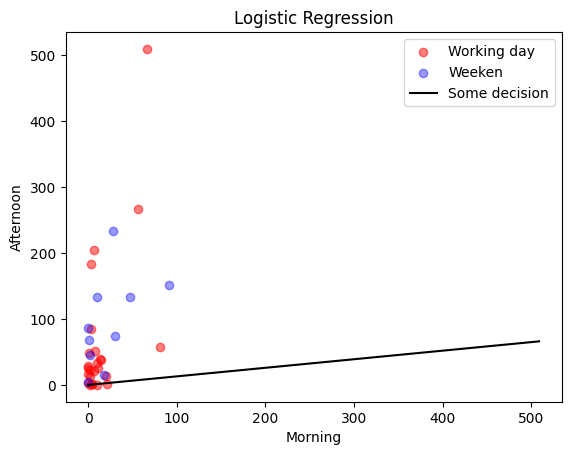

In [465]:
# plt.figure(figsize=(15, 8))

plt.title("Logistic Regression")

plt.scatter(data[data["is_weekend"] == 0]["morning"],
            data[data["is_weekend"] == 0]["afternoon"],
            c="red", alpha=0.5, label = "Working day")


plt.scatter(data[data["is_weekend"] == 1]["morning"],
            data[data["is_weekend"] == 1]["afternoon"],
            c="blue", alpha=0.4, label = "Weeken")

plt.plot(X, Y, color="k", label = "Some decision")

plt.xlabel("Morning")
plt.ylabel("Afternoon")

plt.legend(loc="best")


plt.show()

## 2. Standardizing and logreg

Linear models can be sensitive to the scale of your variables. You make it easier for them to find the optimal solution when you scale your features.

1. Apply `StandardScaler` to `X` and train logistic regression again with the same parameters.
2. Calculate `accuracy` for the new model. Did it get better than a naive classifier with the most popular class?
3. Draw the plots that were described above but for the new model.

In [466]:
scaler = StandardScaler()

In [467]:
data_scaler = data.copy()

In [468]:
data_scaler[["morning", "afternoon"]] = scaler.fit_transform(x)

In [469]:
y = data_scaler["is_weekend"]

In [470]:
x = scaler.fit_transform(x)

In [471]:
model.fit(x, y)

y2_pred = model.predict(x)

In [472]:
data_scaler

,Unnamed: 0,day,morning,afternoon,is_weekend,predict
0,0,2020-04-17,0.200690,-0.719904,0,1
1,1,2020-04-18,-0.655914,-0.071822,1,0
2,2,2020-04-19,0.072199,-0.592251,1,0
3,3,2020-04-20,-0.613084,-0.513696,0,0
4,4,2020-04-21,-0.698744,-0.494057,0,0
5,5,2020-04-22,-0.698744,-0.464599,0,0
6,6,2020-04-23,-0.270442,-0.415502,0,0
7,7,2020-04-24,-0.613084,-0.602071,0,0
8,8,2020-04-25,0.586162,-0.012906,1,0
9,9,2020-04-26,0.500501,1.548382,1,0


In [473]:
accuracy_model = accuracy_score(data['is_weekend'], data['predict'])

In [474]:
print(accuracy_model)

0.6285714285714286


In [475]:
most_popelar_class = data["is_weekend"].mode()[0]

native_predictions = [most_popelar_class] * len(data)

accuracy_native = accuracy_score(data["is_weekend"], native_predictions)

In [476]:
print(accuracy_native)

0.7142857142857143


In [477]:
accuracy_scaler = accuracy_score(data["is_weekend"], y2_pred)

In [478]:
print(accuracy_scaler)

0.7428571428571429


## Координаты для границ

In [479]:
a = -model.coef_[0][0] / model.coef_[0][1]

b = -model.intercept_[0] / model.coef_[0][1]

In [480]:
X = np.linspace(min(data_scaler["morning"]), max(data_scaler["afternoon"]), 100)

Y = a * X + b

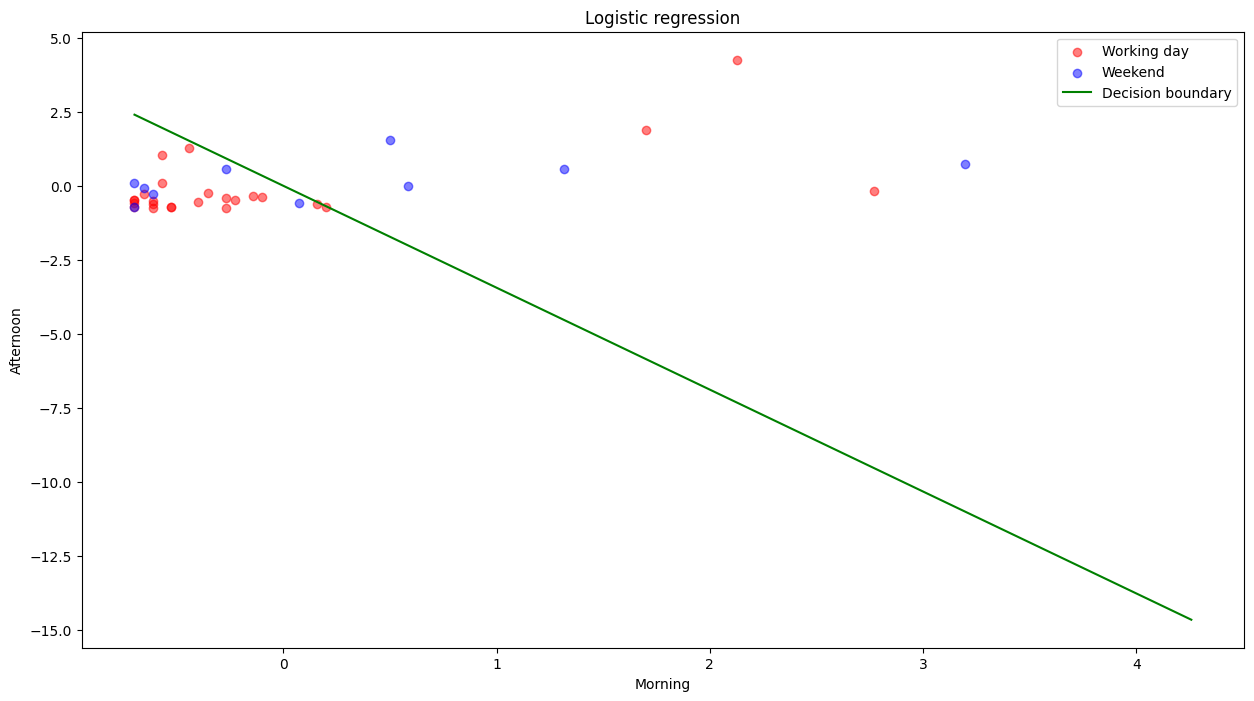

In [481]:
plt.figure(figsize=(15, 8))

plt.title('Logistic regression')

plt.scatter(data_scaler[data_scaler['is_weekend'] == 0]['morning'],
            data_scaler[data_scaler['is_weekend'] == 0]['afternoon'],
            c='red', alpha=0.5, label='Working day')

plt.scatter(data_scaler[data_scaler['is_weekend'] == 1]['morning'],
            data_scaler[data_scaler['is_weekend'] == 1]['afternoon'],
            c='blue', alpha=0.5, label='Weekend')

plt.plot(X, Y, color='green', label='Decision boundary')

plt.xlabel('Morning')
plt.ylabel('Afternoon')

plt.legend(loc='best')

plt.show()

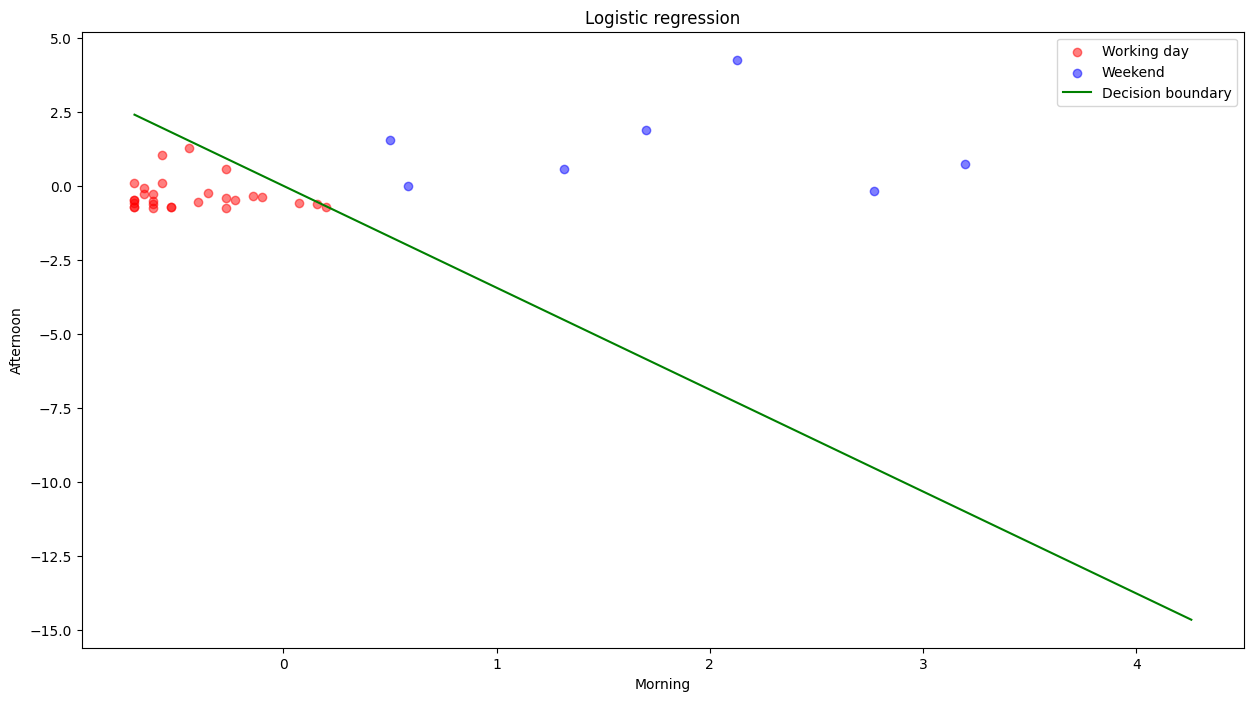

In [482]:
data_scaler["predict"] = y2_pred

plt.figure(figsize=(15, 8))

plt.title('Logistic regression')

plt.scatter(data_scaler[data_scaler['predict'] == 0]['morning'],
            data_scaler[data_scaler['predict'] == 0]['afternoon'],
            c='red', alpha=0.5, label='Working day')

plt.scatter(data_scaler[data_scaler['predict'] == 1]['morning'],
            data_scaler[data_scaler['predict'] == 1]['afternoon'],
            c='blue', alpha=0.5, label='Weekend')

plt.plot(X, Y, color='green', label='Decision boundary')

plt.xlabel('Morning')
plt.ylabel('Afternoon')

plt.legend(loc='best')

plt.show()

## 3. SVM

1. Apply `SVC` model to the scaled dataframe using parameters `probability=True`, `random_state=21`.
2. Calculate `accuracy`.
3. Try different kernels, find the best in terms of accuracy.
4. Draw both plots again with the decisions boundary to see how this algorithm works.

In [483]:
data_svc = data.copy()
data_svc = data_svc.drop(columns="predict")

In [484]:
data_svc

,Unnamed: 0,day,morning,afternoon,is_weekend
0,0,2020-04-17,21,2,0
1,1,2020-04-18,1,68,1
2,2,2020-04-19,18,15,1
3,3,2020-04-20,2,23,0
4,4,2020-04-21,0,25,0
5,5,2020-04-22,0,28,0
6,6,2020-04-23,10,33,0
7,7,2020-04-24,2,14,0
8,8,2020-04-25,30,74,1
9,9,2020-04-26,28,233,1


In [485]:
data_svc[["morning", "afternoon"]] = scaler.fit_transform(data[["morning", "afternoon"]])

In [486]:
data_svc

,Unnamed: 0,day,morning,afternoon,is_weekend
0,0,2020-04-17,0.200690,-0.719904,0
1,1,2020-04-18,-0.655914,-0.071822,1
2,2,2020-04-19,0.072199,-0.592251,1
3,3,2020-04-20,-0.613084,-0.513696,0
4,4,2020-04-21,-0.698744,-0.494057,0
5,5,2020-04-22,-0.698744,-0.464599,0
6,6,2020-04-23,-0.270442,-0.415502,0
7,7,2020-04-24,-0.613084,-0.602071,0
8,8,2020-04-25,0.586162,-0.012906,1
9,9,2020-04-26,0.500501,1.548382,1


## Делим данные на:
    - Признаки

    - Целевые

In [487]:
x = data_svc[["morning", "afternoon"]].values
y = data_svc["is_weekend"].values

In [488]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
best_score = 0
best_kernel = ''

In [489]:
for kernel in kernels:
    model = SVC(kernel=kernel, probability=True, random_state=45)

    model.fit(x, y)

    y3_pred = model.predict(x)

    data_svc[kernel] = y3_pred

    score = accuracy_score(y, y3_pred)

    if score > best_score:
        best_score = score
        best_kernel = kernel

    print(f"Kernel {kernel}: score {score}")

Kernel linear: score 0.7142857142857143
Kernel poly: score 0.7428571428571429
Kernel rbf: score 0.7428571428571429
Kernel sigmoid: score 0.6857142857142857


In [490]:
print(f"Best Kernel {best_kernel}")
print(f"Best Score {best_score}")

Best Kernel poly
Best Score 0.7428571428571429


In [491]:
data_svc

,Unnamed: 0,day,morning,afternoon,is_weekend,linear,poly,rbf,sigmoid
0,0,2020-04-17,0.200690,-0.719904,0,0,0,0,0
1,1,2020-04-18,-0.655914,-0.071822,1,0,0,0,0
2,2,2020-04-19,0.072199,-0.592251,1,0,0,0,0
3,3,2020-04-20,-0.613084,-0.513696,0,0,0,0,0
4,4,2020-04-21,-0.698744,-0.494057,0,0,0,0,0
5,5,2020-04-22,-0.698744,-0.464599,0,0,0,0,0
6,6,2020-04-23,-0.270442,-0.415502,0,0,0,0,0
7,7,2020-04-24,-0.613084,-0.602071,0,0,0,0,0
8,8,2020-04-25,0.586162,-0.012906,1,0,0,0,0
9,9,2020-04-26,0.500501,1.548382,1,0,0,0,1


## Координаты для границ

In [492]:
h = .02

x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1

In [493]:
X, Y = np.meshgrid(np.arange(x_min, x_max, h),
                   np.arange(y_min, y_max, h))

In [494]:
model = SVC(kernel="poly", probability=True, random_state=45)

model.fit(x, y)

,C,1.0
,kernel,'poly'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


## Применяем модель для каждой точки в сетке

In [495]:
Z = model.predict(np.c_[X.ravel(), Y.ravel()])

## Преобразуем предсказания в двумерный массив

In [496]:
Z = Z.reshape(X.shape)

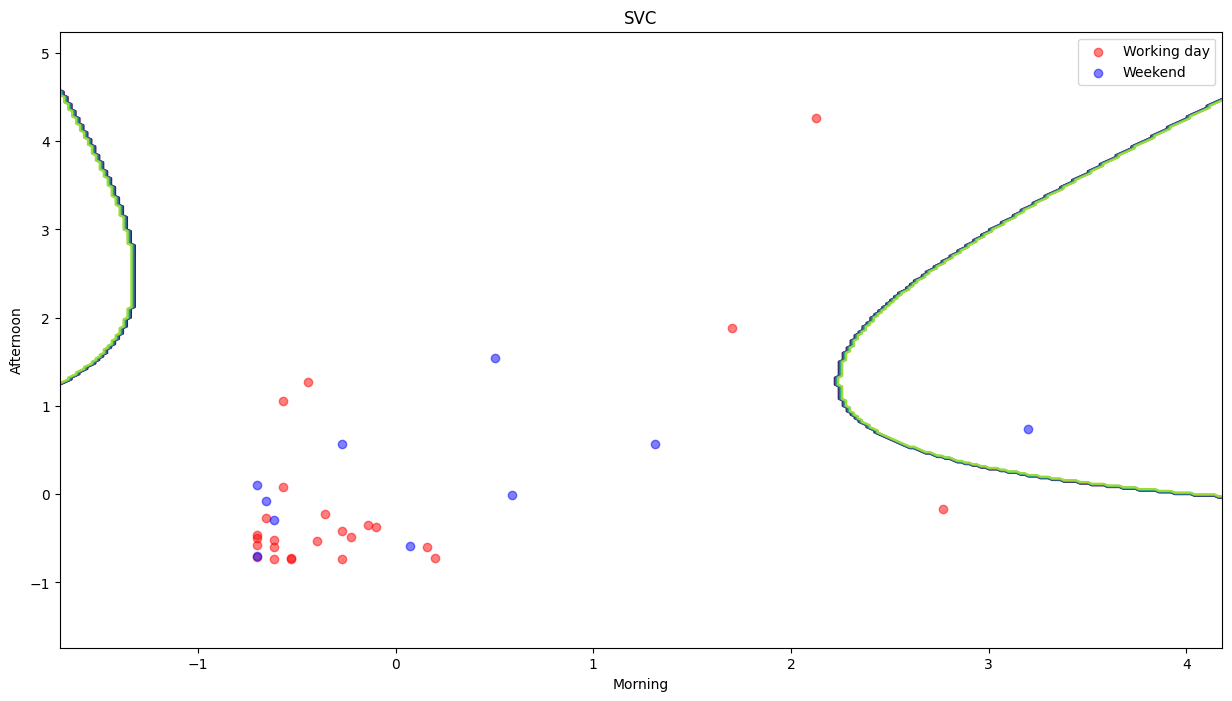

In [497]:
plt.figure(figsize=(15, 8))

plt.title('SVC')

plt.scatter(data_svc[data_svc['is_weekend'] == 0]['morning'],
            data_svc[data_svc['is_weekend'] == 0]['afternoon'],
            c='red', alpha=0.5, label='Working day')

plt.scatter(data_svc[data_svc['is_weekend'] == 1]['morning'],
            data_svc[data_svc['is_weekend'] == 1]['afternoon'],
            c='blue', alpha=0.5, label='Weekend')

plt.contour(X, Y, Z)

plt.xlabel('Morning')
plt.ylabel('Afternoon')

plt.legend(loc='best')

plt.show()

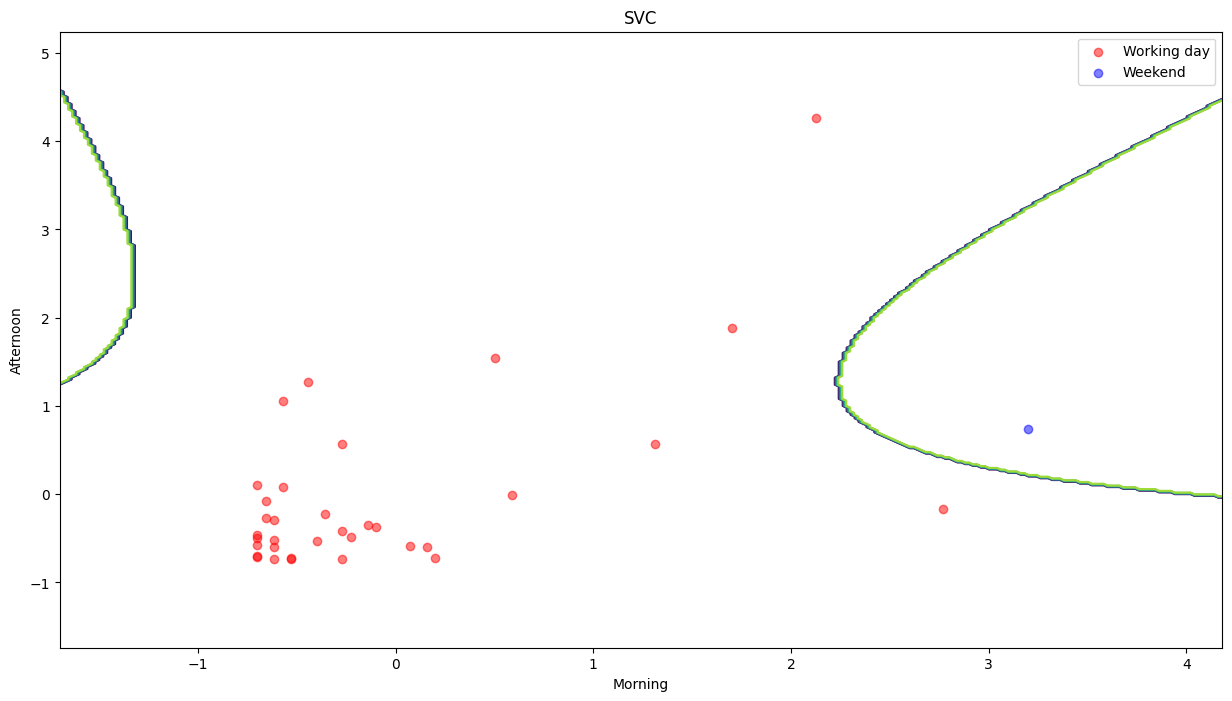

In [498]:
plt.figure(figsize=(15, 8))

plt.title('SVC')

plt.scatter(data_svc[data_svc['poly'] == 0]['morning'],
            data_svc[data_svc['poly'] == 0]['afternoon'],
            c='red', alpha=0.5, label='Working day')

plt.scatter(data_svc[data_svc['poly'] == 1]['morning'],
            data_svc[data_svc['poly'] == 1]['afternoon'],
            c='blue', alpha=0.5, label='Weekend')

plt.contour(X, Y, Z)

plt.xlabel('Morning')
plt.ylabel('Afternoon')

plt.legend(loc='best')

plt.show()

## 4. Decision tree

1. Apply `DecisionTreeClassifier` to the scaled dataframe using parameters `max_depth=4`, `random_state=42`.
2. Calculate accuracy.
3. Try different values of `max_depth`.
4. Draw both plots again with the decisions boundary to see how this algorithm works.
5. Using method `.plot_tree()` visualize the decision tree itself. It is another way of thinking about how the algorithm works.
6. How many leaves in the visualized tree label days as working days? Put your answer in the markdown cell in the end of the section.

In [499]:
data_tree = data.copy()

In [500]:
data_tree[["morning", "afternoon"]] = scaler.fit_transform(data_tree[["morning", "afternoon"]])

In [501]:
x = data_tree[["morning", "afternoon"]].values
y = data_tree["is_weekend"]

In [502]:
for depth in range(1, 8):
    model = DecisionTreeClassifier(max_depth=depth, random_state=45)

    model.fit(x, y)

    y4_pred = model.predict(x)

    score = accuracy_score(y , y4_pred)

    print(f"Score {score} for depth {depth}")

Score 0.7714285714285715 for depth 1
Score 0.8571428571428571 for depth 2
Score 0.8857142857142857 for depth 3
Score 0.9428571428571428 for depth 4
Score 0.9714285714285714 for depth 5
Score 1.0 for depth 6
Score 1.0 for depth 7


In [503]:
model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(x, y)

y4_pred = model.predict(x)
data_tree['predict'] = y4_pred

accuracy_score(y, y4_pred)

0.9428571428571428

## Строим сетку для отображения границы решения

In [504]:
h = .02 
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

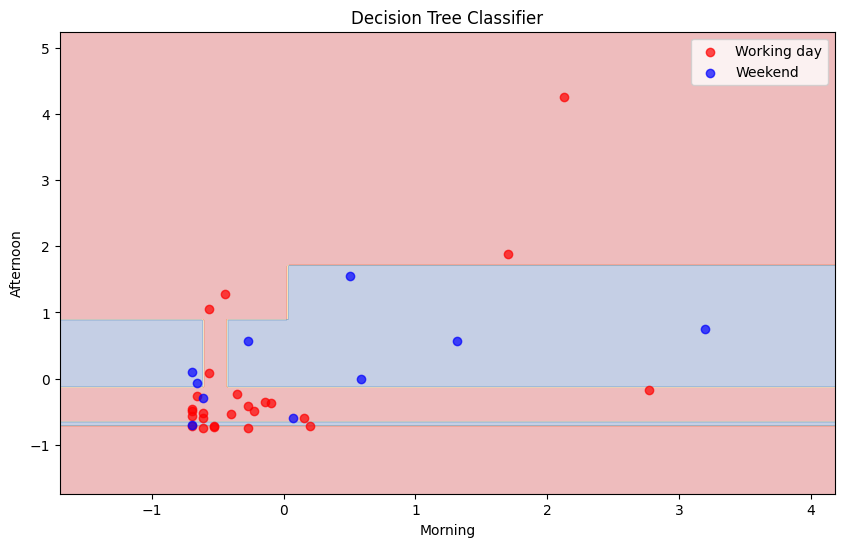

In [505]:
plt.figure(figsize=(10, 6))

plt.contourf(xx, yy, Z, alpha=0.3, cmap='RdYlBu')

plt.scatter(data_tree[data_tree['is_weekend'] == 0]['morning'],
            data_tree[data_tree['is_weekend'] == 0]['afternoon'],
            c='red', label='Working day', alpha=0.7)

plt.scatter(data_tree[data_tree['is_weekend'] == 1]['morning'],
            data_tree[data_tree['is_weekend'] == 1]['afternoon'],
            c='blue', label='Weekend', alpha=0.7)

plt.title('Decision Tree Classifier')

plt.xlabel('Morning')
plt.ylabel('Afternoon')

plt.legend(loc='best')

plt.show()

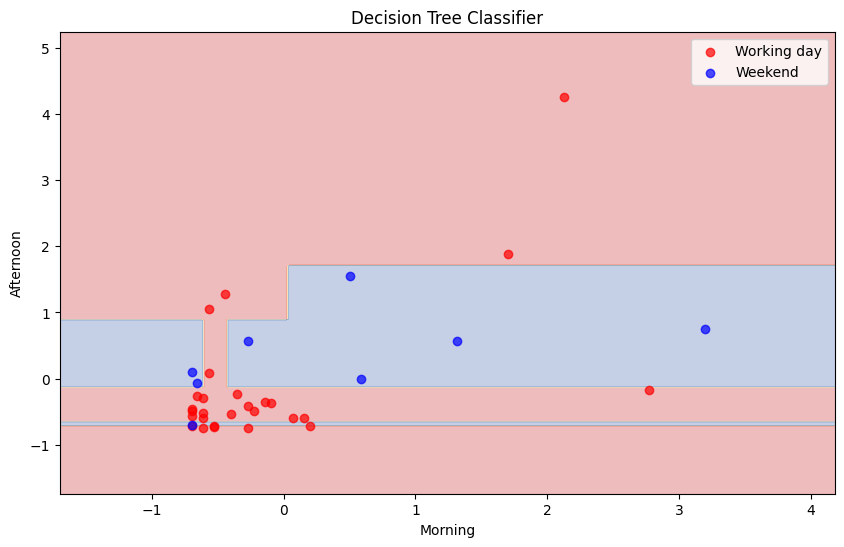

In [506]:
plt.figure(figsize=(10, 6))

plt.contourf(xx, yy, Z, alpha=0.3, cmap='RdYlBu')

plt.scatter(data_tree[data_tree['predict'] == 0]['morning'],
            data_tree[data_tree['predict'] == 0]['afternoon'],
            c='red', label='Working day', alpha=0.7)

plt.scatter(data_tree[data_tree['predict'] == 1]['morning'],
            data_tree[data_tree['predict'] == 1]['afternoon'],
            c='blue', label='Weekend', alpha=0.7)

plt.title('Decision Tree Classifier')

plt.xlabel('Morning')
plt.ylabel('Afternoon')

plt.legend(loc='best')

plt.show()

In [507]:
data_tree

,Unnamed: 0,day,morning,afternoon,is_weekend,predict
0,0,2020-04-17,0.200690,-0.719904,0,0
1,1,2020-04-18,-0.655914,-0.071822,1,1
2,2,2020-04-19,0.072199,-0.592251,1,0
3,3,2020-04-20,-0.613084,-0.513696,0,0
4,4,2020-04-21,-0.698744,-0.494057,0,0
5,5,2020-04-22,-0.698744,-0.464599,0,0
6,6,2020-04-23,-0.270442,-0.415502,0,0
7,7,2020-04-24,-0.613084,-0.602071,0,0
8,8,2020-04-25,0.586162,-0.012906,1,1
9,9,2020-04-26,0.500501,1.548382,1,1


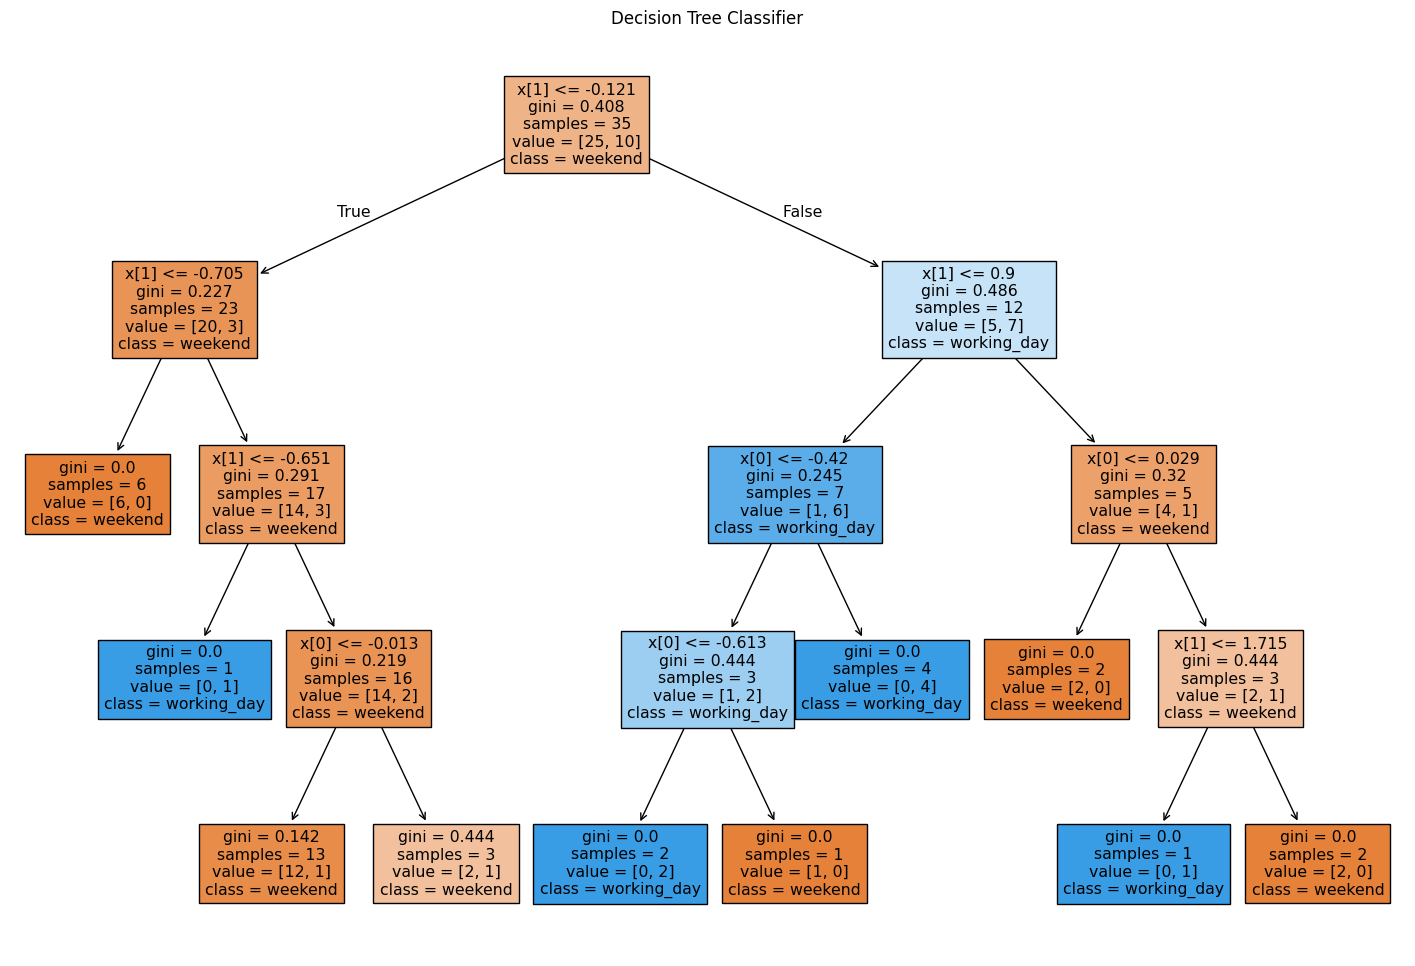

In [508]:
plt.figure(figsize=(18, 12))
plot_tree(model, filled=True, class_names=['weekend', 'working_day'])
plt.title('Decision Tree Classifier')
plt.show()

## Сколько листьев в визуализированном дереве обозначают дни как рабочие? Впишите ответ в ячейку с разметкой в ​​конце раздела.

- 4